In [1]:
# http://scikit-learn.org/stable/modules/density.html
# http://scikit-learn.org/stable/modules/mixture.html

In [2]:
# Density estimation by kernels:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [4]:
# Generate data with normal law
N = 100
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [5]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

In [6]:
# Prapare the true density generated from data X (weighted sum of normal laws):
true_density = (0.3*norm(0,1).pdf(X_plot[:,0]) + 0.7*norm(5,1).pdf(X_plot[:,0]))

In [7]:
# Estimation of density by kernels
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

In [8]:
#calculate density for  X_plot
density = np.exp(kde.score_samples(X_plot))

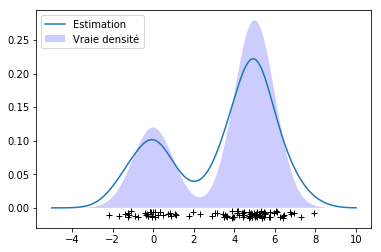

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
ax.legend(loc='upper left')
plt.show()

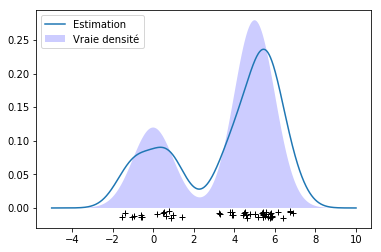

In [10]:
# Let's do the same with different N
N1 = 50
X1 = np.concatenate((np.random.normal(0, 1, int(0.3 * N1)), np.random.normal(5, 1, int(0.7 * N1))))[:, np.newaxis]
X_plot1 = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density1 = (0.3*norm(0,1).pdf(X_plot1[:,0]) + 0.7*norm(5,1).pdf(X_plot1[:,0]))
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X1)
density1 = np.exp(kde1.score_samples(X_plot1))
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.fill(X_plot1[:,0], true_density1, fc='b', alpha=0.2, label='Vraie densité')
ax1.plot(X_plot1[:,0], density1, '-', label="Estimation")
ax1.plot(X1[:, 0], -0.005 - 0.01 * np.random.random(X1.shape[0]), '+k')
ax1.legend(loc='upper left')
plt.show()

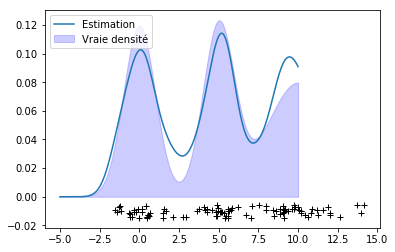

In [11]:
# Let's use different number of normal laws
N2 = 100
X2 = np.concatenate((np.random.normal(0, 1, int(0.3 * N2)), np.random.normal(5, 1, int(0.3 * N2))))[:, np.newaxis]
X2 = np.concatenate((X2[: ,0], np.random.normal(10, 2, int(0.4 * N2))))[:, np.newaxis]
X_plot2 = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density2 = (0.3*norm(0,1).pdf(X_plot2[:,0]) + 0.3*norm(5,1).pdf(X_plot2[:,0]) + 0.4*norm(10,2).pdf(X_plot2[:,0]))
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.67).fit(X2)
density2 = np.exp(kde2.score_samples(X_plot2))
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.fill_between(X_plot2[:,0], true_density2, y2=0, color='b', alpha=0.2, label='Vraie densité')
ax2.plot(X_plot2[:,0], density2, '-', label="Estimation")
ax2.plot(X2[:, 0], -0.005 - 0.01 * np.random.random(X2.shape[0]), '+k')
ax2.legend(loc='upper left')
plt.show()

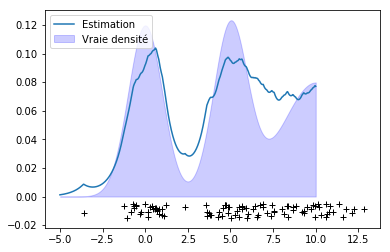

In [12]:
# Let's use different kernel
N3 = 100
X3 = np.concatenate((np.random.normal(0, 1, int(0.3 * N3)), np.random.normal(5, 1, int(0.3 * N3))))[:, np.newaxis]
X3 = np.concatenate((X3[: ,0], np.random.normal(10, 2, int(0.4 * N3))))[:, np.newaxis]
X_plot3 = np.linspace(-5, 10, 1000)[:, np.newaxis]
true_density3 = (0.3*norm(0,1).pdf(X_plot3[:,0]) + 0.3*norm(5,1).pdf(X_plot3[:,0]) + 0.4*norm(10,2).pdf(X_plot3[:,0]))
kde3 = KernelDensity(kernel='exponential', bandwidth=0.7).fit(X3)
density3 = np.exp(kde3.score_samples(X_plot3))
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.fill_between(X_plot2[:,0], true_density3, y2=0, color='b', alpha=0.2, label='Vraie densité')
ax3.plot(X_plot3[:,0], density3, '-', label="Estimation")
ax3.plot(X3[:, 0], -0.005 - 0.01 * np.random.random(X3.shape[0]), '+k')
ax3.legend(loc='upper left')
plt.show()

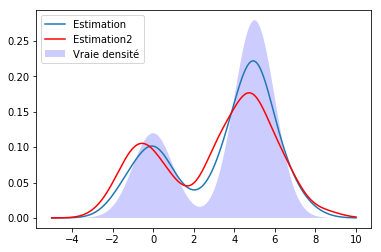

In [13]:
# Generate data according to the estimated density
Xg = kde.sample(N)
kde2 = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(Xg)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
ax.plot(X_plot[:,0], density, '-', label="Estimation")
ax.plot(X_plot[:,0], np.exp(kde2.score_samples(X_plot)), 'r-', label="Estimation2")
ax.legend(loc='upper left')
plt.show()

In [3]:
# Working with 2 dimensional data
N = 100
kd1 = np.random.rand(int(0.4*N), 2)
kd2 = 0.5*(np.random.rand(int(0.6*N), 2)) + 4*np.ones((1, 1))
kd = np.vstack((kd1, kd2))

In [19]:
# Define the visualization grid:
grid_size = 100
Gx = np.arange(0, 5, 5/grid_size)
Gy = np.arange(0, 5, 5/grid_size)
Gx, Gy = np.meshgrid(Gx, Gy)

In [20]:
# define bandwidth
bw = 0.04

In [21]:
# Estimation
kde3 = KernelDensity(kernel='gaussian', bandwidth=bw).fit(kd)


In [22]:
# Calcul of density on grid:
Z = np.exp(kde3.score_samples(np.hstack(((Gx.reshape(grid_size*grid_size))[:,np.newaxis],
        (Gy.reshape(grid_size*grid_size)[:,np.newaxis])))))

<IPython.core.display.Javascript object>


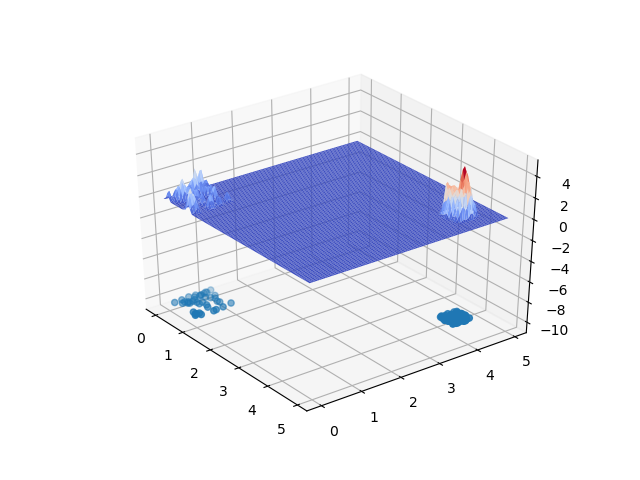

In [23]:
# Display 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(Gx, Gy, Z.reshape(grid_size,grid_size), rstride=1,
                    cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.scatter(kd[:,0], kd[:,1], -10)
plt.show()